# Album Review Notebook

I have been an avid music listener for years, fueled by my curiosity of musical history, love for different cultures, and awe of musical genius. Despite this, I was not keeping track of which genres, songs, albums, or artists I sought out. Since June 2025, I have decided to finally document my music listening journey in the form of album reviews on Google Slides. It has been incredibly fun and rewarding to listen to old favorites, relive nostalgic phases, and discover new albums. Even more so, it has been incredibly rewarding to share my passion project with friends and family. I have loved having conversations about what songs we put each other on and conversations of music in general. Please check out my [slide presentation (here)](https://docs.google.com/presentation/d/1-sit7RucDORoW2wk91QiWHLnOfyox87Op5ot0wf52d0/edit?usp=sharing) if you haven't already!

The purpose of this notebook is to manage, clean, visualize, and analyze the 'Album Review' Google Slides. As a passion project, this notebook will consistently be updated. I will be going step by step on how I do everything. If you ever get confused please let me know so I can rewrite clearer notes. I hope you find this as fun or interesting as much as I had fun writing it!

### Loading Libraries and Data

From the Google Slides, I have a Google Apps Script that automatically exports the Google Slides text data into a Google Sheet such that each row represents a slide and each column represents a text box. Because my Slides have (mostly) consistent formatting, the Google Sheet also has (mostly) consistent formatting throughout the entire spreadsheet. This Google Sheet is then imported into this notebook, and is the source of data for this project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://docs.google.com/spreadsheets/d/17I3OvnBi4OnVEHwU6rUbvNAtlaSK3j25RCozVECPVAU/export?format=csv'
df = pd.read_csv(url)

These are the first 5 rows representing the first 5 slides in the slide presentation. Notice that each text box is separated in its own column.

In [3]:
df.head()

,album,artist_year,length,genre,country_lang,rating,all_song_ratings,all_songs,caption,fav_song,recommend,superlative1,superlative2
0,Valentino’s Album Ratings,All 5/5s*:,Hello all. I document albums I have listened t...,⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑,*All 5/5 albums that I’ve covered on this docu...,Rating System,PERFECT 🤯\nI Love it😍\nI like it😜\nFine😋\nBad🤮,NaN,NaN,NaN,NaN,NaN,NaN
1,DeBÍ TiRAR MáS FOToS,Bad Bunny\n2025,"17 songs, 62:01",Genre: Reggaetón,Puerto Rico (Spanish),Overall: */5,⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n\n\n\n⭑⭑⭑⭑\n\n\n\n⭑⭑⭑⭑\...,Nuevayol\t\t3:03\nVoy a llevarte pa PR\t2:36\n...,“”,Favorite Song\nasdf,I Recommend\nasdf,Honorable Mention\nasdf,asdf\nasdf
2,Rock Doido,Gaby Amarantos\n2025,"22 songs, 36:53",Genre: Funk Brasileiro,Brazil (Portuguese),Overall: 2/5,⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑\n(interlude)\n⭑⭑⭑⭑\...,Essa Noite Eu Vou Pro Rock\t1:13\nArrume-se Co...,“Whole album plays like a DJ set. Mix of Arabi...,Favorite Song\nDá‑Lhe Sal,I Recommend\nArrume-se Comigo,Hardest Beat\nShort Beira Cu,Wish It Were Longer\nCarregador De Aparelhagem
3,Luminescent Creatures,Ichiko Aoba\n2025,"11 songs, 35:39","Genre: Folk, Ambient",Japan (Japanese),Overall: */5,⭑⭑⭑⭑\n⭑⭑\n\n⭑⭑⭑⭑\n⭑⭑⭑\n\n⭑⭑⭑⭑⭑\n⭑⭑\n⭑⭑⭑,"Coloratura\t\t4:08\n24° 03' 27.0"" \t1:08\nN 12...",“”,Favorite Song\nasdf,I Recommend\nasdf,Honorable Mention\nasdf,asdf\nasdf
4,Let God Sort Em Out,"Pusha T, Malice\n2025","13 songs, 40:52","Genre: HipHop, Rap",USA (English),Overall: 2/5,⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n...,The Birds Don't Sing\t\t4:00\nChains & Whips\t...,“I feel like this should’ve blown my mind but ...,Favorite Song\nE.B.I.T.D.A.,I Recommend\nAce Trumpets,Honorable Mention\nAll Things Considered,Hardest Beat\nSo Be It


# Cleaning Data

I will be going step by step on how I clean the unstructured text data from Google Slides. Here is the typical format for an album review on my Google Slide:

!["slide_template"](slide_template.jpg)

I will separate this data into 3 dataframes:
1. `album` contains basic album info that can be found on the left side of the slide.
2. `song` contains info on each song that can be found in the middle of the slide.
3. `semantic` contains text data such as the caption and superlatives I give each album.

## Unfinished Album Reviews

Before we get into cleaning, I thought it would be fun to look at the albums I have not finished writing a review for.

In [4]:
unfinished_reviews = df[df['rating'].str.contains('\*', na = False)]

In [5]:
unfinished_reviews[['album', 'artist_year']]

,album,artist_year
1,DeBÍ TiRAR MáS FOToS,Bad Bunny\n2025
3,Luminescent Creatures,Ichiko Aoba\n2025
9,YHLQMDLG,Bad Bunny\n2020
21,Minecraft: Volume Alpha,C418\n2011
23,You Will Never Know Why,Sweet Trip\n2009
60,1996,Ryuichi Sakamoto\n1996
65,Circus,Eraserheads\n1994
68,15 Boleros De Oro,Los Cadetes De Linares\n1994 (1977-1982)
109,Chavela Vargas,Chavela Vargas\n1961


## Album Dataframe

The `album` dataframe represents the data on albums I have finished writing a review for. It will contain info of the album but not the songs. It will have schema:

`'album', 'artist', 'year', 'rating', 'genre', 'country', 'language', 'num_songs', 'runtime'`

In [6]:
album = df[~df['rating'].str.contains('\*', na = False)]
album = album.loc[1:, ['album', 'artist_year', 'length', 'genre', 'country_lang', 'rating']].reset_index(drop=True)
album.head()

,album,artist_year,length,genre,country_lang,rating
0,Rock Doido,Gaby Amarantos\n2025,"22 songs, 36:53",Genre: Funk Brasileiro,Brazil (Portuguese),Overall: 2/5
1,Let God Sort Em Out,"Pusha T, Malice\n2025","13 songs, 40:52","Genre: HipHop, Rap",USA (English),Overall: 2/5
2,I Lay Down My Life For You,JPEGMAFIA\n2024,"14 songs, 41:24","Genre: HipHop, Experimental",USA (English),Overall: 3/5
3,Spectre,Blu Swing\n2023,"11 songs, 43:43",Genre: Jazz Pop,"Japan (Japanese, English)",Overall: 3/5
4,De Todas Las Flores,Natalia Lafourcade\n2022,"12 songs, 66:36","Genre: Bolero, Mexican Folk",Mexico (Spanish),Overall: 4/5


Now we do some dirty work:
1. Converting `ratings` column to numeric.
2. Splitting `artist_year` column into `artist` and `year`
3. Converting `year` column to numeric
4. Splitting `length` to `num_songs` and `runtime`
5. Converting both `num_songs` and `runtime` to numeric
6. Cleaning `genre` column
7. Splitting `country_lang` column into `country` and `language`
8. Reordering columns to make more visually comprehensive

In [7]:
# Converting ratings col to numeric
album['rating'] = album['rating'].apply(lambda x: int(x[-3]))

# Splitting artist_year into artist and year
album[['artist', 'year']] = album['artist_year'].str.split('\n', expand = True)

# Converting year col into numeric
album['year'] = album['year'].apply(lambda x: int(x[0:4]))

# Splitting length col to num_songs and runtime
album[['num_songs', 'runtime']] = album['length'].str.split(' songs, ', expand = True)

# Converting num_songs to numeric
album['num_songs'] = album['num_songs'].astype(int)

# Converting runtime to timedelta object which measures time
from datetime import datetime, timedelta
album['runtime'] = album['runtime'].apply(lambda x: timedelta(
    minutes = int(x[:x.find(':')]),
    seconds = int(x[x.find(':') + 1:])))

# Text Cleaning the genre col
album['genre'] = album['genre'].apply(lambda x: x[7:])

# Splitting country_lang into country and language
album[['country', 'language']] = album['country_lang'].str.split(' \(', expand = True)
album['language'] = album['language'].apply(lambda x: x[:-1])

# Reordering / selecting columns
album = album[['album', 'artist', 'year', 'rating', 'genre', 'country', 'language', 'num_songs', 'runtime']]

In [8]:
album.head()

,album,artist,year,rating,genre,country,language,num_songs,runtime
0,Rock Doido,Gaby Amarantos,2025,2,Funk Brasileiro,Brazil,Portuguese,22,0 days 00:36:53
1,Let God Sort Em Out,"Pusha T, Malice",2025,2,"HipHop, Rap",USA,English,13,0 days 00:40:52
2,I Lay Down My Life For You,JPEGMAFIA,2024,3,"HipHop, Experimental",USA,English,14,0 days 00:41:24
3,Spectre,Blu Swing,2023,3,Jazz Pop,Japan,"Japanese, English",11,0 days 00:43:43
4,De Todas Las Flores,Natalia Lafourcade,2022,4,"Bolero, Mexican Folk",Mexico,Spanish,12,0 days 01:06:36


With that our `album` dataframe is ready for analysis.

## Songs Dataframe

Dataset of the rating I give each song. I am only going to attach the album name. Album name can be like a foreign key to later combine dataset for further analysis.

In [9]:
song = df[~df['rating'].str.contains('\*', na = False)]
song = song.loc[1:, ['album', 'all_songs', 'all_song_ratings']].reset_index(drop = True)
song.head()

,album,all_songs,all_song_ratings
0,Rock Doido,Essa Noite Eu Vou Pro Rock\t1:13\nArrume-se Co...,⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑\n(interlude)\n⭑⭑⭑⭑\...
1,Let God Sort Em Out,The Birds Don't Sing\t\t4:00\nChains & Whips\t...,⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n...
2,I Lay Down My Life For You,I Scream This In The Mirror \t1:48\nBefore I I...,⭑\n\n⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑⭑⭑\n⭑\n⭑⭑...
3,Spectre,We’ll Be Right Back \t4:22\nCall Out\t\t\t4:55...,⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑\n⭑⭑\n⭑\n⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑...
4,De Todas Las Flores,Vine Solita\t\t\t6:26\nDe Todas Las Flores\t\t...,⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑⭑⭑⭑\n⭑⭑...


#### Cleaning `all_songs`

To demonstrate the text cleaning, I will show an example of the unstructured text data from Marvin Gaye's "I Want You". Notice the following inconsistencies:
1. All songs and song lengths are bundled in a single line of text.
2. Inconsistent amount of `\t`'s between the name of song and the length of song
3. The song "After The Dance (Instrumental)" is formatted like `After The Dance \t\t4:21\n(Instrumental)` because the song name was too long to fit in a single line on the Google Slide.

While the inconsistencies are annoying, at least they are (mostly) consistent across the entire Google Slide. 

In [10]:
marvin_gaye_songs = song[song['album'] == 'I Want You']['all_songs'].squeeze()
marvin_gaye_songs

'I Want You (Vocal)\t\t4:35\nCome Live With Me Angel\t6:28\nAfter The Dance \t\t4:21\n(Instrumental)\nFeel All My Love Inside\t3:23\nI Wanna Be Where You Are\t1:17\nI Want You (Intro Jam)\t0:20\nAll The Way Around\t\t3:45\nSince I Had You\t\t4:05\nSoon I’ll Be Loving \t\t3:16\nYou Again\t\nI Want You (Intro Jam)\t1:36\nAfter The Dance (Vocal)\t4:40'

I want to separate each song name and song length into their own row. 

In [11]:
import re
def parse_song_text(text, album):
  # Splitting at each new line
  lines = [line.strip() for line in text.split('\n') if line.strip()]

  # Initializing columns
  song_name = []
  song_length = []

  # iterate through each line
  for line in lines:
    # RegEx pattern to group song name and song length
    match = re.match(r'(.+?)\s+(\d{1,3}:\d{2})$', line)

    # if there is a match, then we have both the name and length of song
    if match:
      song_length.append(match.groups()[1])
      song_name.append(match.groups()[0])

    # if not, then the song name is split across lines
    # we need to edit the previous text data to append the rest of the song name
    else:
      song_name[len(song_name)-1] = song_name[len(song_name)-1] + ' ' + line

  # creating output as a dataframe
  result = pd.DataFrame({'album': album, 'name': song_name, 'length': song_length})
  # converting song length to timedelta object
  result['length'] = result['length'].apply(lambda x: timedelta(
      minutes = int(x[:x.find(':')]),
      seconds = int(x[x.find(':') + 1:])))

  return result

I will showcase below what the above function does with some sample code from the function. The first line of text data reads `I Want You (Vocal)\t\t4:35`. We can separate the song `I Want You (Vocal)` from its length of `4:35` into separate groups using RegEx patterns.

In [12]:
lines = [line.strip() for line in marvin_gaye_songs.split('\n') if line.strip()]
print(lines)
match = re.match(r"(.+?)\s+(\d{1,3}:\d{2})$", lines[0])
(match.groups())

['I Want You (Vocal)\t\t4:35', 'Come Live With Me Angel\t6:28', 'After The Dance \t\t4:21', '(Instrumental)', 'Feel All My Love Inside\t3:23', 'I Wanna Be Where You Are\t1:17', 'I Want You (Intro Jam)\t0:20', 'All The Way Around\t\t3:45', 'Since I Had You\t\t4:05', 'Soon I’ll Be Loving \t\t3:16', 'You Again', 'I Want You (Intro Jam)\t1:36', 'After The Dance (Vocal)\t4:40']


('I Want You (Vocal)', '4:35')

In [13]:
parse_song_text(marvin_gaye_songs, 'I Want You')

,album,name,length
0,I Want You,I Want You (Vocal),0 days 00:04:35
1,I Want You,Come Live With Me Angel,0 days 00:06:28
2,I Want You,After The Dance (Instrumental),0 days 00:04:21
3,I Want You,Feel All My Love Inside,0 days 00:03:23
4,I Want You,I Wanna Be Where You Are,0 days 00:01:17
5,I Want You,I Want You (Intro Jam),0 days 00:00:20
6,I Want You,All The Way Around,0 days 00:03:45
7,I Want You,Since I Had You,0 days 00:04:05
8,I Want You,Soon I’ll Be Loving You Again,0 days 00:03:16
9,I Want You,I Want You (Intro Jam),0 days 00:01:36


With that we now need to do this for EACH album.

In [14]:
def expand_songs(df):
  all_songs = []
  # iterating through each row
  # while iteration is typically not advised, I am working with relatively small data
  for _, row in df.iterrows():
    album_songs = parse_song_text(row['all_songs'], row['album'])
    all_songs.append(album_songs)

  # all rows for all albums in a single column
  return pd.concat(all_songs, ignore_index=True)

In [15]:
name_length = expand_songs(song)
name_length

,album,name,length
0,Rock Doido,Essa Noite Eu Vou Pro Rock,0 days 00:01:13
1,Rock Doido,Arrume-se Comigo,0 days 00:01:20
2,Rock Doido,Short Beira Cu,0 days 00:02:16
3,Rock Doido,Mamãe Mandou,0 days 00:01:28
4,Rock Doido,Te Amo Fudido,0 days 00:02:43
...,...,...,...
1190,Samba Esquema Novo,Quero Esquecer Você,0 days 00:02:22
1191,Samba Esquema Novo,Uála Uálalá,0 days 00:02:08
1192,Samba Esquema Novo,A Tamba,0 days 00:03:04
1193,Samba Esquema Novo,Menina Bonita Não Chora,0 days 00:02:07


In [16]:
album['num_songs'].sum()

1195

The line `album['num_songs'].sum()` gives us the total number of songs according to the album dataframe. Notice that it matches with the length of the dataframe we just created. We now have a dataframe with the name and length of the song. Next step is to get the ratings.

#### Cleaning `all_song_ratings`

Now we clean the text data containing the ratings of each song. This is comparatively simple to the previous section. Each `\n` represents a new song. There will be some interludes I have to consider.

In [17]:
marving_gaye_ratings = song.loc[song['album'] == 'I Want You', 'all_song_ratings'].squeeze()
marving_gaye_ratings

'⭑⭑⭑⭑⭑\n⭑⭑⭑⭑\n⭑⭑⭑\n\n⭑⭑⭑\n⭑⭑⭑⭑\n(interlude)\n⭑⭑⭑⭑⭑\n⭑⭑⭑\n⭑⭑⭑⭑⭑\n\n⭑⭑⭑⭑\n⭑⭑⭑⭑'

In [18]:
def parse_rating_text(text):
  # splitting each line
  lines = [line.strip() for line in text.split('\n') if len(line.strip()) > 0]
  rating = []

  # looking for stars in each line
  for line in lines:
    # if not then this means it is an interlude/ unrated song
    if line.find('⭑') == -1:
      rating.append(-1)

    # if there are stars then the number of stars is the rating
    else:
      rating.append(len(line))

  return pd.DataFrame({'rating': rating})

In [19]:
parse_rating_text(marving_gaye_ratings)

,rating
0,5
1,4
2,3
3,3
4,4
5,-1
6,5
7,3
8,5
9,4


In [20]:
def expand_ratings(df):
  all_ratings = []
  # iterating through each row
  # while this is typically not advised, I am working with relatively small data
  for _, row in df.iterrows():
    album_songs = parse_rating_text(row['all_song_ratings'])
    all_ratings.append(album_songs)

  # all rows for all albums in a single column
  return pd.concat(all_ratings, ignore_index=True)

In [21]:
ratings = expand_ratings(song)
ratings

,rating
0,2
1,4
2,4
3,3
4,2
...,...
1190,4
1191,3
1192,3
1193,4


### Join Clean Dataframes

Now that we have cleaned the name/length text data and the rating text data, a final dataframe is ready to be combined. I will create two dataframes:
1. Contains all songs (including interludes/unrated songs)
2. Contains only songs I have rated

In [22]:
song = pd.concat([name_length, ratings], axis = 1)  # merging dataframes
all_song = song[['album', 'name', 'length', 'rating']]
song = song.loc[song['rating'] != -1, ['album', 'name', 'length', 'rating']].reset_index(drop = True)

Here are all the tracks I did not rate.

In [23]:
all_song[all_song['rating'] == -1]

,album,name,length,rating
6,Rock Doido,Interlúdio Égua Mana,0 days 00:00:36,-1
13,Rock Doido,Interlúdio Rock Doido,0 days 00:00:30,-1
77,Hellfire,Half Time,0 days 00:00:26,-1
108,Serotonin II,See You Space Cowboy,0 days 00:01:15,-1
110,Serotonin II,Nuclear War Post IV,0 days 00:00:50,-1
136,Those Who Throw Objects At The Crocodiles Will...,Poem (1),0 days 00:00:27,-1
141,Those Who Throw Objects At The Crocodiles Will...,Poem (2),0 days 00:00:25,-1
288,The Campfire Headphase,Into The Rainbow Vein,0 days 00:00:44,-1
746,Orange,Intro,0 days 00:00:21,-1
755,CrazySexyCool,Intro-lude,0 days 00:01:01,-1


Here is the final dataframe!

In [24]:
song

,album,name,length,rating
0,Rock Doido,Essa Noite Eu Vou Pro Rock,0 days 00:01:13,2
1,Rock Doido,Arrume-se Comigo,0 days 00:01:20,4
2,Rock Doido,Short Beira Cu,0 days 00:02:16,4
3,Rock Doido,Mamãe Mandou,0 days 00:01:28,3
4,Rock Doido,Te Amo Fudido,0 days 00:02:43,2
...,...,...,...,...
1169,Samba Esquema Novo,Quero Esquecer Você,0 days 00:02:22,4
1170,Samba Esquema Novo,Uála Uálalá,0 days 00:02:08,3
1171,Samba Esquema Novo,A Tamba,0 days 00:03:04,3
1172,Samba Esquema Novo,Menina Bonita Não Chora,0 days 00:02:07,4


## Semantic Dataframe

Because there is still text data on the Slide that isn't allocated into any dataframe and isn't very useful for analysis, I will separate it into its own dataframe. This is mainly for conventional purposes and I most likely won't be using this dataframe much.

In [25]:
semantic = df[~df['rating'].str.contains('\*', na = False)]
semantic = semantic.loc[1:, ['album', 'caption', 'fav_song', 'recommend', 'superlative1', 'superlative2']].reset_index(drop = True)
semantic.head()

,album,caption,fav_song,recommend,superlative1,superlative2
0,Rock Doido,“Whole album plays like a DJ set. Mix of Arabi...,Favorite Song\nDá‑Lhe Sal,I Recommend\nArrume-se Comigo,Hardest Beat\nShort Beira Cu,Wish It Were Longer\nCarregador De Aparelhagem
1,Let God Sort Em Out,“I feel like this should’ve blown my mind but ...,Favorite Song\nE.B.I.T.D.A.,I Recommend\nAce Trumpets,Honorable Mention\nAll Things Considered,Hardest Beat\nSo Be It
2,I Lay Down My Life For You,“Probably not my favorite JPEG album but some ...,Favorite Song\nI'll Be Right There,I Recommend\nEither On Or Off The Drugs,Honorable Mention\nDon't Put Anything On The B...,Most Fun Song\nIt's Dark And Hell Is Hot
3,Spectre,“Thank you Richard for recommending me this al...,Favorite Song\nBlue Moon,I Recommend\nクラゲ,Honorable Mention\nCall Out,Best Finale\nシンプルラブ
4,De Todas Las Flores,“Lafourcade is doing the world a favor by expo...,Favorite Song\nMaría La Curandera,I Recommend\nEl Lugar Correcto,Honorable Mention\nPajarito Colibrí,Mas Triste\nQue Te Vaya Bonito Nicolás


The steps needed to clean this dataset are
1. Remove quotes from `caption`
2. Clean `fav_song`
3. Clean `recommend`
4. Clean `superlative1`
5. Clean `superlative2`

I dont know how to deal with the superlatives. I can create 2 new columns that say the superlative title along with the song. I also have the option of emitting the superlative title all together. I am going to sleep on it until I want to run some analysis on it.

In [26]:
semantic['caption'] = semantic['caption'].apply(lambda x: x.strip()[1:-1])
semantic['fav_song'] = semantic['fav_song'].apply(lambda x: x.split('\n')[1])
semantic['recommend'] = semantic['recommend'].apply(lambda x: x.split('\n')[1])
semantic['superlative1'] = semantic['superlative1'].apply(lambda x: x.split('\n')[1])
semantic['superlative2'] = semantic['superlative2'].apply(lambda x: x.split('\n')[1])

In [27]:
semantic.head()

,album,caption,fav_song,recommend,superlative1,superlative2
0,Rock Doido,Whole album plays like a DJ set. Mix of Arabic...,Dá‑Lhe Sal,Arrume-se Comigo,Short Beira Cu,Carregador De Aparelhagem
1,Let God Sort Em Out,I feel like this should’ve blown my mind but I...,E.B.I.T.D.A.,Ace Trumpets,All Things Considered,So Be It
2,I Lay Down My Life For You,Probably not my favorite JPEG album but some g...,I'll Be Right There,Either On Or Off The Drugs,Don't Put Anything On The Bible,It's Dark And Hell Is Hot
3,Spectre,Thank you Richard for recommending me this alb...,Blue Moon,クラゲ,Call Out,シンプルラブ
4,De Todas Las Flores,Lafourcade is doing the world a favor by expos...,María La Curandera,El Lugar Correcto,Pajarito Colibrí,Que Te Vaya Bonito Nicolás


# Summary Statistics

Some summary statistics for y'all! Let me know what kind of visuals/tables would be cool to see.

Here are all the albums I have given a 5/5!

In [28]:
album[album['rating'] == 5]

,album,artist,year,rating,genre,country,language,num_songs,runtime
6,Windswept Adan,Ichiko Aoba,2020,5,"Ambient, Folk",Japan,Japanese,14,0 days 00:50:02
18,ランプ幻想,Lamp,2008,5,Jazz Pop,Japan,Japanese,11,0 days 00:50:00
22,Dulce Beat,Belanova,2005,5,"Pop, Synthpop",Mexico,Spanish,11,0 days 00:37:04
31,Velocity : Design : Comfort,Sweet Trip,2003,5,Glitch Pop,USA,English,12,0 days 01:13:25
36,Discovery,Daft Punk,2001,5,"Dance, Electronic",France,English,14,0 days 01:00:50
37,Is This It,The Strokes,2001,5,Indie Rock,USA,English,11,0 days 00:35:11
43,98.12.28 男達の別れ,Fishmans,1999,5,"Psychedelia, Post Rock",Japan,Japanese,14,0 days 02:10:19
48,Dots And Loops,Stereolab,1997,5,"Art Pop, Psychedelic","France, UK","French, English",10,0 days 01:05:52
51,宇宙 日本 世田谷,Fishmans,1997,5,Psychedelic,Japan,"Japanese, English",8,0 days 00:58:38
60,Selected Ambient Works 85-92,Aphex Twin,1992,5,"Ambient, Electronic",UK,English,13,0 days 01:14:20


This function is to easily access specific albums across all datasets.

In [29]:
def get_album_info(album_name):
  return list([album[album['album'] == album_name],
               song[song['album'] == album_name],
               semantic[semantic['album'] == album_name]])

In [30]:
get_album_info('I Want You')

[         album       artist  year  rating       genre country language  \
 83  I Want You  Marvin Gaye  1976       4  Soul, Funk     USA  English   
 
     num_songs         runtime  
 83         11 0 days 00:37:54  ,
            album                            name          length  rating
 1011  I Want You              I Want You (Vocal) 0 days 00:04:35       5
 1012  I Want You         Come Live With Me Angel 0 days 00:06:28       4
 1013  I Want You  After The Dance (Instrumental) 0 days 00:04:21       3
 1014  I Want You         Feel All My Love Inside 0 days 00:03:23       3
 1015  I Want You        I Wanna Be Where You Are 0 days 00:01:17       4
 1016  I Want You              All The Way Around 0 days 00:03:45       5
 1017  I Want You                 Since I Had You 0 days 00:04:05       3
 1018  I Want You   Soon I’ll Be Loving You Again 0 days 00:03:16       5
 1019  I Want You          I Want You (Intro Jam) 0 days 00:01:36       4
 1020  I Want You         After The Dance

Now I will do some basic tables/plots of data.

### Column Summaries

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
album['rating'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating,100.0,3.59,0.922174,1.0,3.0,4.0,4.0,5.0


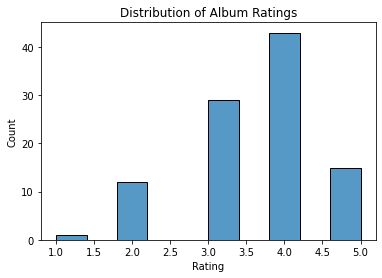

In [33]:
sns.histplot(album['rating'])
plt.xlabel('Rating')
plt.title('Distribution of Album Ratings')
plt.show()

In [34]:
song['rating'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating,1174.0,3.559625,1.147043,1.0,3.0,4.0,5.0,5.0


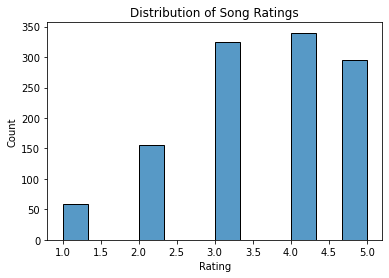

In [35]:
sns.histplot(song['rating'])
plt.xlabel('Rating')
plt.title('Distribution of Song Ratings')
plt.show()

In [36]:
album['year'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
year,100.0,1995.02,15.566073,1963.0,1982.0,1997.0,2005.0,2025.0


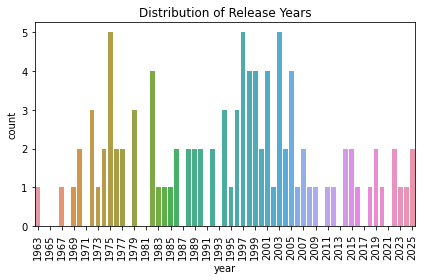

In [37]:
sns.countplot(data = album, x = 'year',
              order = range(album['year'].min(), album['year'].max() + 1))
plt.title('Distribution of Release Years')
plt.xticks(ticks = range(0, album['year'].max() - album['year'].min() + 1, 2),
           rotation = 90)
plt.tight_layout()
plt.show()

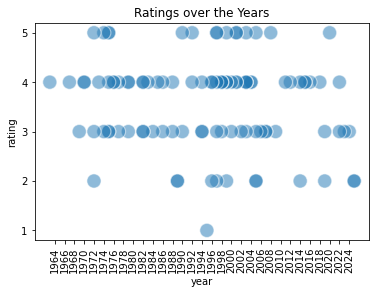

In [38]:
sns.scatterplot(data = album, x = 'year', y = 'rating', 
                style='rating', legend=False, s = 200, alpha = 0.5, 
                markers = ['o', 'o', 'o', 'o', 'o'])
plt.yticks(ticks = [1, 2, 3, 4, 5])
plt.xticks(ticks = range(album['year'].min()+1, album['year'].max(), 2),
           rotation = 90)
plt.title('Ratings over the Years')
plt.show()

All the artists that have more than 1 review so far. Pretty good indicator of my favorite artists.

In [39]:
artist_count = album.groupby('artist').count().reset_index()
artist_count[artist_count['album'] > 1][['artist', 'album']]

,artist,album
3,Aphex Twin,2
6,Belanova,2
7,Björk,2
11,Boards of Canada,2
15,Caifanes,2
20,Daft Punk,2
30,Faye Wong,2
33,Fishmans,3
46,Lamp,2
65,Sade,2


# Data Analysis

Slightly more in depth data analysis that can hopefully uncover some patterns.

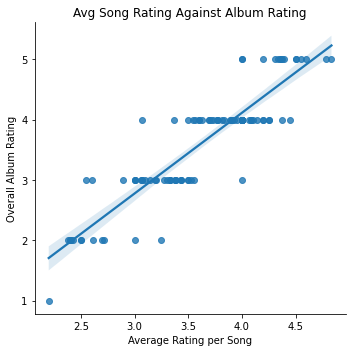

In [40]:
avg_rating = song[['album', 'rating']].groupby('album').mean()
rating_plot = album[['album', 'rating']].groupby('album').mean().\
    merge(avg_rating, on = 'album').reset_index()
rating_plot = rating_plot.rename(columns = {'rating_x':'album_rating', 'rating_y':'avg_song_rating'})

sns.lmplot(data = rating_plot, x = 'avg_song_rating', y = 'album_rating')
plt.ylabel('Overall Album Rating')
plt.xlabel('Average Rating per Song')
plt.title('Avg Song Rating Against Album Rating')
plt.tight_layout()
plt.show()

Highest Residuals on the plot. AKA highest mismatch of song ratings to album rating.

In [41]:
rating_plot['resid'] = rating_plot['album_rating'] - rating_plot['avg_song_rating']
rating_plot.sort_values(by = 'resid', key = abs, ascending=False)[:10]

,album,album_rating,avg_song_rating,resid
39,In The Heart Of The Moon,2.0,3.250000,-1.250000
81,Tri Repetae,1.0,2.200000,-1.200000
2,A Tábua De Esmeralda,5.0,4.000000,1.000000
21,Dulce Beat,5.0,4.000000,1.000000
23,Emperor Tomato Ketchup,2.0,3.000000,-1.000000
55,Places And Spaces,3.0,4.000000,-1.000000
20,Drukqs,4.0,3.066667,0.933333
32,Heaven or Las Vegas,5.0,4.200000,0.800000
75,The Campfire Headphase,2.0,2.714286,-0.714286
50,Mateo Solo Bien Se Lame,2.0,2.692308,-0.692308
